In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [6]:
im_path = "/Users/wbandabarragan/Library/CloudStorage/Dropbox/Yachay_Tech/Semestre7_2025/CP1/"

In [7]:
img = Image.open(im_path + "clouds.jpg")

In [11]:
img_array = np.array(img)

print(img_array.shape)

(311, 453, 3)


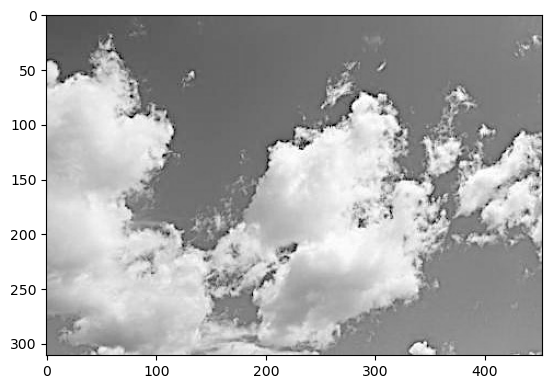

In [12]:
plt.figure()

plt.imshow(img_array)

plt.show()

In [13]:
fourier_img = np.fft.fft2(img_array)

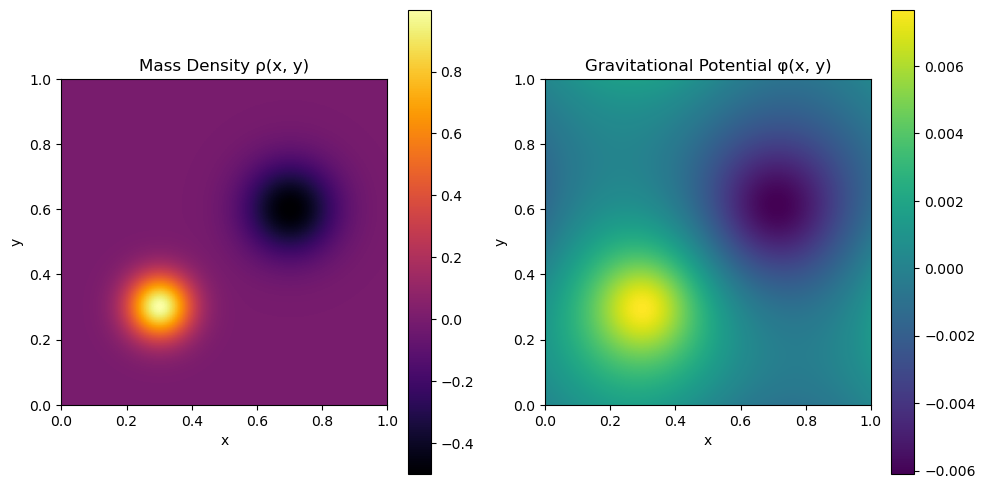

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftfreq
from matplotlib.animation import FuncAnimation

# Grid setup
N = 200
L = 1.0
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, y)

# Mass density: two Gaussian clumps
rho = (
    np.exp(-((X - 0.3)**2 + (Y - 0.3)**2) / 0.01)
    - 0.5 * np.exp(-((X - 0.7)**2 + (Y - 0.6)**2) / 0.02)
)

# Fourier-space Poisson solver
kx = fftfreq(N, d=L/N) * 2*np.pi
ky = fftfreq(N, d=L/N) * 2*np.pi
KX, KY = np.meshgrid(kx, ky)
K2 = KX**2 + KY**2
K2[0, 0] = 1  # avoid divide by zero at (0,0), will set result to 0 later

# Solve Poisson equation: ∇²φ = ρ
rho_hat = fft2(rho)
phi_hat = rho_hat / K2
phi_hat[0, 0] = 0  # set average potential to zero
phi = np.real(ifft2(phi_hat))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im1 = axs[0].imshow(rho, extent=[0, L, 0, L], origin='lower', cmap='inferno')
axs[0].set_title('Mass Density ρ(x, y)')
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(phi, extent=[0, L, 0, L], origin='lower', cmap='viridis')
axs[1].set_title('Gravitational Potential φ(x, y)')
fig.colorbar(im2, ax=axs[1])

for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


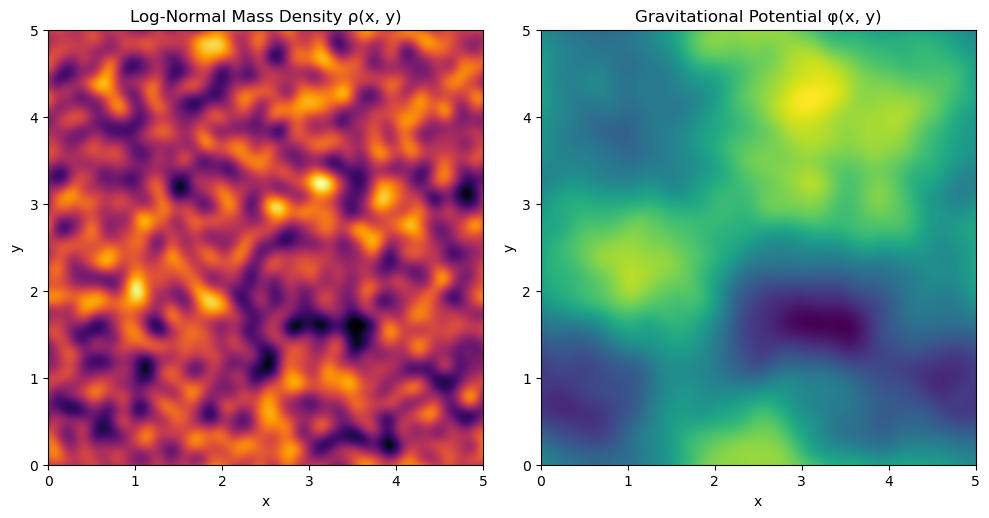

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftfreq

# Grid setup
N = 2000
L = 5.0
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, y)

# Base Gaussian random field (smooth using FFT filtering)
np.random.seed(42)
noise = np.random.normal(0, 1, (N, N))

# Smooth the noise in Fourier space
k = fftfreq(N, d=L/N) * 2 * np.pi
KX, KY = np.meshgrid(k, k)
K2 = KX**2 + KY**2
K2[0, 0] = 1  # avoid divide-by-zero

filter_kernel = np.exp(-K2 * 0.005)  # controls smoothness
noise_hat = fft2(noise)
smooth_noise = np.real(ifft2(noise_hat * filter_kernel))

# Create log-normal field: rho = exp(Gaussian)
rho = np.exp(smooth_noise)

# Normalize for visualization
rho /= np.mean(rho)

# Solve Poisson equation ∇²φ = ρ using spectral method
rho_hat = fft2(rho)
K2[0, 0] = 1  # avoid division by 0
phi_hat = rho_hat / K2
phi_hat[0, 0] = 0  # mean potential set to 0
phi = np.real(ifft2(phi_hat))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im1 = axs[0].imshow(rho, extent=[0, L, 0, L], origin='lower', cmap='inferno')
axs[0].set_title('Log-Normal Mass Density ρ(x, y)')
#fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(phi, extent=[0, L, 0, L], origin='lower', cmap='viridis')
axs[1].set_title('Gravitational Potential φ(x, y)')
#fig.colorbar(im2, ax=axs[1])

for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()
